In [2]:
import torch
from torch_geometric.utils import to_networkx, from_networkx
from sklearn import metrics
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In [3]:
import os
import torch
import networkx as nx
import pandas as pd

def extract_graph_info(folder_path):
    all_edges = []
    
    # 遍历文件夹中的所有文件
    for filename in os.listdir(folder_path):
        if filename.startswith('graph_in_snapshot_') and filename.endswith('.pt'):
            # 提取时间信息
            time_str = filename.split('_')[-1].split('.')[0]
            
            # 加载图数据
            graph = torch.load(os.path.join(folder_path, filename))
            
            # 将图数据转换为 NetworkX 图
            nx_graph = to_networkx(graph, to_undirected=False)
            
            # 提取边信息
            edges = nx_graph.edges()
            
            # 将时间信息添加到每条边
            for src, tgt in edges:
                all_edges.append([src, tgt, time_str])
    
    # 创建DataFrame
    df = pd.DataFrame(all_edges, columns=['source_node', 'target_node', 'time'])
    
    # 按照节点ID排序
    df.sort_values(by=['source_node', 'target_node'], inplace=True)
    
    # 保存到CSV文件
    # df.to_csv('graph_edges.csv', index=False)

# 使用函数
folder_path = 'data/Twibot-20/graph_data/graphs/'
# extract_graph_info(folder_path)

In [4]:
import os
import torch
import networkx as nx
import pandas as pd
from datetime import datetime

def extract_graph_info(folder_path):
    all_edges = []
    time_list = []
    
    # 遍历文件夹中的所有文件以确定最早的时间
    for filename in os.listdir(folder_path):
        if filename.startswith('graph_in_snapshot_') and filename.endswith('.pt'):
            # 提取时间信息
            time_str = filename.split('_')[-1].split('.')[0]
            time_list.append(time_str)
    
    # 将时间字符串转换为日期对象
    time_list = [datetime.strptime(time_str, '%Y-%m-%d') for time_str in time_list]
    
    # 找到最早的时间
    earliest_time = min(time_list)
    
    # 再次遍历文件夹中的所有文件，计算每个文件的时间与最早时间的月份差值
    for filename in os.listdir(folder_path):
        if filename.startswith('graph_in_snapshot_') and filename.endswith('.pt'):
            # 提取时间信息
            time_str = filename.split('_')[-1].split('.')[0]
            current_time = datetime.strptime(time_str, '%Y-%m-%d')
            
            # 计算月份差值
            months_diff = (current_time.year - earliest_time.year) * 12 + (current_time.month - earliest_time.month)
            
            # 加载图数据
            graph = torch.load(os.path.join(folder_path, filename))
            
            # 将图数据转换为 NetworkX 图
            nx_graph = to_networkx(graph, to_undirected=False)
            
            # 提取边信息
            edges = nx_graph.edges()
            
            # 将时间信息添加到每条边
            for src, tgt in edges:
                all_edges.append([src, tgt, months_diff])
    
    # 创建DataFrame
    df = pd.DataFrame(all_edges, columns=['source_node', 'target_node', 'time'])
    
    # 按照节点ID排序
    # df.sort_values(by=['source_node', 'target_node'], inplace=True)
    # 先按照时间排序，再按照节点ID排序
    df.sort_values(by=['time', 'source_node', 'target_node'], inplace=True)
    
    # 保存到CSV文件
    df.to_csv('ml_Twi20.csv', index=False)

# 使用函数
folder_path = 'data/Twibot-20/graph_data/graphs/'
# extract_graph_info(folder_path)

In [5]:
import os
import torch
import networkx as nx
import pandas as pd
from datetime import datetime

def extract_graph_info_by_year(folder_path):
    all_edges = []
    time_list = []
    
    # 遍历文件夹中的所有文件以确定最早的时间
    for filename in os.listdir(folder_path):
        if filename.startswith('graph_in_snapshot_') and filename.endswith('.pt'):
            # 提取时间信息
            time_str = filename.split('_')[-1].split('.')[0]
            time_list.append(time_str)
    
    # 将时间字符串转换为日期对象
    time_list = [datetime.strptime(time_str, '%Y-%m-%d') for time_str in time_list]
    
    # 找到最早的时间
    earliest_time = min(time_list)
    
    # 再次遍历文件夹中的所有文件，计算每个文件的时间与最早时间的年份差值
    for filename in os.listdir(folder_path):
        if filename.startswith('graph_in_snapshot_') and filename.endswith('.pt'):
            # 提取时间信息
            time_str = filename.split('_')[-1].split('.')[0]
            current_time = datetime.strptime(time_str, '%Y-%m-%d')
            
            # 计算年份差值
            years_diff = current_time.year - earliest_time.year
            
            # 加载图数据
            graph = torch.load(os.path.join(folder_path, filename))
            
            # 将图数据转换为 NetworkX 图
            nx_graph = to_networkx(graph, to_undirected=False)
            
            # 提取边信息
            edges = nx_graph.edges()
            
            # 将时间信息添加到每条边
            for src, tgt in edges:
                all_edges.append([src, tgt, years_diff])
    
    # 创建DataFrame
    df = pd.DataFrame(all_edges, columns=['source_node', 'target_node', 'time'])
    
    # 按照时间、节点ID排序
    df.sort_values(by=['time', 'source_node', 'target_node'], inplace=True)
    
    # 保存到CSV文件
    df.to_csv('ml_Twi20_by_year.csv', index=False)

# 使用函数
folder_path = 'data/Twibot-20/graph_data/graphs/'
extract_graph_info_by_year(folder_path)

In [7]:
import os
import torch

def load_annual_graphs(folder_path, start_year=2008, end_year=2020, month='12-01'):
    graphs = []
    
    for year in range(start_year, end_year + 1):
        if year == end_year:
            filename = f'graph_in_snapshot_{year}-10-01.pt'
        else:
            filename = f'graph_in_snapshot_{year}-{month}.pt'
        
        file_path = os.path.join(folder_path, filename)
        
        if os.path.exists(file_path):
            graph = torch.load(file_path)
            graphs.append(graph)
        else:
            print(f"File {filename} does not exist.")
    
    return graphs

# 使用函数
g_path = 'data/Twibot-20/graph_data/graphs/'
annual_graphs = load_annual_graphs(g_path, start_year=2008, end_year=2020, month='12-01')

# 保存到文件
torch.save(annual_graphs, 'annual_graphs_2008_2020.pt')

In [8]:
annual_graphs

[Data(edge_index=[2, 1249], edge_type=[1249], exist_nodes=[229580], clustering_coefficient=[229580, 1], bidirectional_links_ratio=[229580, 1], n_id=[229580]),
 Data(edge_index=[2, 14946], edge_type=[14946], exist_nodes=[229580], clustering_coefficient=[229580, 1], bidirectional_links_ratio=[229580, 1], n_id=[229580]),
 Data(edge_index=[2, 27264], edge_type=[27264], exist_nodes=[229580], clustering_coefficient=[229580, 1], bidirectional_links_ratio=[229580, 1], n_id=[229580]),
 Data(edge_index=[2, 45331], edge_type=[45331], exist_nodes=[229580], clustering_coefficient=[229580, 1], bidirectional_links_ratio=[229580, 1], n_id=[229580]),
 Data(edge_index=[2, 63063], edge_type=[63063], exist_nodes=[229580], clustering_coefficient=[229580, 1], bidirectional_links_ratio=[229580, 1], n_id=[229580]),
 Data(edge_index=[2, 78992], edge_type=[78992], exist_nodes=[229580], clustering_coefficient=[229580, 1], bidirectional_links_ratio=[229580, 1], n_id=[229580]),
 Data(edge_index=[2, 95374], edge_ty

In [2]:
# 加载张量
g_path = 'data/Twibot-20/graph_data/graphs/'
g1 = torch.load(g_path+'graph_in_snapshot_2008-01-01.pt')
g6 = torch.load(g_path+'graph_in_snapshot_2008-06-01.pt')
g12 = torch.load(g_path+'graph_in_snapshot_2008-12-01.pt')

# 打印张量内容
print(g1)
print(g6)
print(g12)

Data(edge_index=[2, 170], edge_type=[170], exist_nodes=[229580], clustering_coefficient=[229580, 1], bidirectional_links_ratio=[229580, 1], n_id=[229580])
Data(edge_index=[2, 429], edge_type=[429], exist_nodes=[229580], clustering_coefficient=[229580, 1], bidirectional_links_ratio=[229580, 1], n_id=[229580])
Data(edge_index=[2, 1249], edge_type=[1249], exist_nodes=[229580], clustering_coefficient=[229580, 1], bidirectional_links_ratio=[229580, 1], n_id=[229580])


In [46]:
d_path = 'data/Twibot-20/processed_data/'
labels = torch.load(d_path+'label.pt')
labels,labels.shape


(tensor([0, 1, 0,  ..., 1, 1, 1]), torch.Size([11826]))

In [47]:
labels = torch.concat([labels,torch.tensor([-1 for i in range(g1.n_id.shape[0]-labels.shape[0])])],dim=0)
labels,labels.shape

(tensor([ 0,  1,  0,  ..., -1, -1, -1]), torch.Size([229580]))

In [43]:
# 获取每个标签对应的节点索引
label_indices = {}
unique_labels = labels.unique()

for l in unique_labels:
    label_indices[l.item()] = torch.nonzero(labels == l).view(-1)

# 打印每个标签对应的节点索引
for label, indices in label_indices.items():
    print(f"Label {label}: Node indices {indices}, shape {indices.shape}")

Label 0: Node indices tensor([    0,     2,     3,  ..., 11814, 11815, 11817]), shape torch.Size([5237])
Label 1: Node indices tensor([    1,     4,     8,  ..., 11823, 11824, 11825]), shape torch.Size([6589])


In [7]:
class0, class1, class2 = label_indices[0], label_indices[1], label_indices[-1]

class0.shape, class1.shape, class2.shape

(torch.Size([5237]), torch.Size([6589]), torch.Size([217754]))

In [8]:
g1 = to_networkx(g1, to_undirected=False)
g6 = to_networkx(g6, to_undirected=False)
g12 = to_networkx(g12, to_undirected=False)

In [9]:
def get_nodes_from_g(g):
    n = []
    for edge in g.edges():
        n.append(edge[0])
        n.append(edge[1])
    n = list(set(n))
    return n

In [10]:
n1 = get_nodes_from_g(g1)
n6 = get_nodes_from_g(g6)
n12 = get_nodes_from_g(g12)

len(n1),len(n6),len(n12),len(n6)-len(n1),len(n12)-len(n1),len(n12)-len(n6)

(231, 561, 1536, 330, 1305, 975)

In [11]:
class0_l = list(class0.numpy().tolist())
class1_l = list(class1.numpy().tolist())
class2_l = list(class2.numpy().tolist())
class0_l[:10],class1_l[:10],class2_l[:10]

([0, 2, 3, 5, 6, 7, 9, 10, 11, 12],
 [1, 4, 8, 13, 16, 17, 18, 20, 25, 41],
 [11826, 11827, 11828, 11829, 11830, 11831, 11832, 11833, 11834, 11835])

In [12]:
constraint_g1 = {}
for i in range(len(n1)):
    ego_g1 = nx.ego_graph(g1, n1[i], radius=3)
    constraint_g1 = constraint_g1 | nx.constraint(ego_g1)

constraint_g1

{76292: nan,
 133125: nan,
 132111: nan,
 117187: nan,
 113737: nan,
 117354: nan,
 4112: 0.14285714285714285,
 114008: nan,
 112665: nan,
 117119: nan,
 145696: nan,
 142009: nan,
 143616: nan,
 9747: 0.3333333333333333,
 215060: nan,
 36375: nan,
 113689: nan,
 539: 1.0,
 20326: nan,
 214089: nan,
 215809: nan,
 7706: 0.5,
 219161: nan,
 37401: nan,
 29: nan,
 3617: 0.20000000000000004,
 97063: nan,
 98795: nan,
 93868: nan,
 96175: nan,
 96733: nan,
 45536: nan,
 8743: 0.25,
 41322: nan,
 40814: nan,
 43165: nan,
 3113: 1.0,
 25348: nan,
 149036: nan,
 38957: nan,
 166446: nan,
 149039: nan,
 147505: nan,
 100402: nan,
 194610: nan,
 149557: nan,
 103994: nan,
 100922: nan,
 3646: 0.5,
 98184: nan,
 95826: nan,
 96855: 0.20000000000000004,
 86333: nan,
 8382: nan,
 85568: nan,
 38465: nan,
 141378: nan,
 24129: nan,
 220229: nan,
 131141: nan,
 101449: nan,
 150605: nan,
 1355: 1.0,
 10829: 0.5,
 40302: nan,
 40543: nan,
 1312: 0.25,
 1415: nan,
 38215: nan,
 427: nan,
 38349: nan,


In [13]:
from numba import jit
from tqdm import tqdm

# @jit
def ego_ana(g, ego_nodes, radius=3):
    ego_feats = []
    
    for node in tqdm(ego_nodes):
        ego_size = []
        ego_avg_deg = []
        ego_clu = []
        ego_con = []
        
        ego_subgraph = nx.ego_graph(g, node, radius)
        ego_size.append(len(ego_subgraph))
        ego_avg_deg.append(sum(list(dict(ego_subgraph.degree()).values()))/len(ego_subgraph))
        ego_clu.append(sum(list(nx.clustering(ego_subgraph).values()))/len(ego_subgraph))
        ego_con.append(sum(list(nx.constraint(ego_subgraph).values()))/len(ego_subgraph))

        ego_feats.append(ego_size)
        ego_feats.append(ego_avg_deg)
        ego_feats.append(ego_clu)
        ego_feats.append(ego_con)
    
    ego_feats = np.array(ego_feats)
    ego_feats = ego_feats/ego_feats.max(axis=0)

    return torch.tensor(ego_feats)

In [14]:
class0_ego_feats = ego_ana(g1, n1, radius=3)
class0_ego_feats, class0_ego_feats.shape

100%|██████████| 231/231 [00:00<00:00, 3692.80it/s]


(tensor([[nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
         [nan],
        

In [15]:
def ego_plot(g, ego_nodes, radius, num_rows, num_cols):

    # 设置子图的行和列
    # num_rows = 11
    # num_cols = 4

    # 创建一个新的图形
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))

    for i, node in enumerate(ego_nodes):
        # 计算子图在图中的位置
        row = i // num_cols
        col = i % num_cols

        ego_subgraph = nx.ego_graph(g, node, radius)

        # 创建一个节点标签的字典，设置橙色、绿色和红色的节点
        node_colors = ['green' if n in class0_l else 'red' if n in class1_l else 'grey' if n in class2_l else 'orange' for n in ego_subgraph.nodes()]

        # 使用布局算法绘制ego子图
        pos = nx.spring_layout(ego_subgraph)
        
        # 绘制ego子图到相应的子图位置
        nx.draw(ego_subgraph, pos, with_labels=True, node_size=120, ax=axes[row, col], node_color=node_colors, font_size=5)
        
        # 设置标题
        axes[row, col].set_title(f'Ego Subgraph for Node {node}')

    # 调整子图之间的间距
    plt.tight_layout()

    # 显示图
    plt.show()

In [16]:
humans0 = list(set(class0_l).intersection(set(n1)))
humans0,len(humans0)

([11650,
  5383,
  1415,
  3724,
  4112,
  9747,
  5397,
  9625,
  7706,
  539,
  8090,
  29,
  1694,
  5790,
  1312,
  3617,
  5020,
  8743,
  1191,
  809,
  9640,
  5291,
  1196,
  427,
  183,
  5943,
  316,
  8382,
  2245,
  1355,
  10829,
  10701,
  10831,
  3794,
  8915,
  6357,
  4822,
  7894,
  2391,
  4825,
  5976,
  224,
  4065,
  9314,
  4195,
  11236,
  4197,
  103,
  2152,
  8297,
  10607,
  243,
  3703,
  11259,
  8318],
 55)

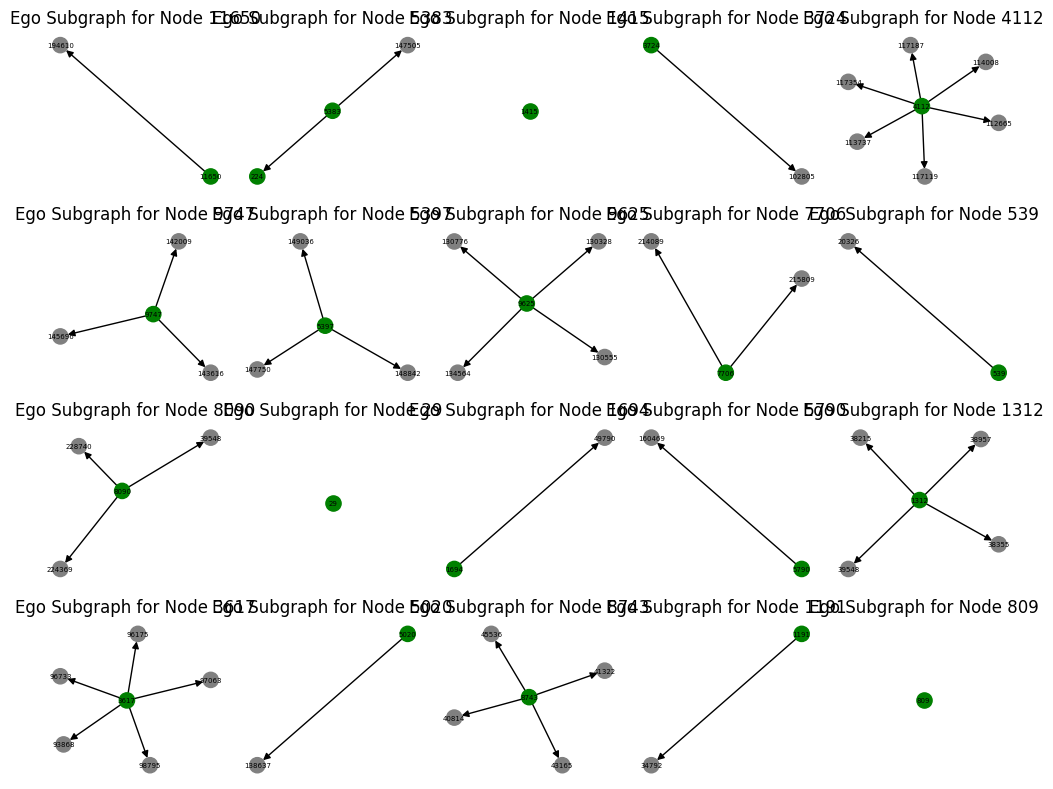

In [17]:
ego_plot(g1, humans0[:20], radius=3,num_rows=4, num_cols=5)

In [18]:
humans6 = list(set(class0_l).intersection(set(n6)))
humans6,len(humans6)

([516,
  4618,
  3596,
  4112,
  9747,
  6170,
  539,
  7706,
  29,
  33,
  3617,
  8743,
  1067,
  2109,
  4158,
  10829,
  9294,
  10831,
  3156,
  5723,
  8288,
  9314,
  4195,
  1124,
  4197,
  103,
  2152,
  8297,
  7794,
  3703,
  8825,
  2170,
  636,
  9340,
  8318,
  3724,
  4239,
  2191,
  2193,
  9361,
  4243,
  6291,
  2196,
  2198,
  3737,
  4762,
  1694,
  5790,
  8868,
  165,
  1191,
  5291,
  1196,
  3762,
  6835,
  1205,
  183,
  4792,
  8382,
  8895,
  4800,
  2245,
  4304,
  3794,
  8915,
  1235,
  6357,
  4822,
  7894,
  4825,
  224,
  3813,
  239,
  11503,
  1265,
  243,
  3836,
  2305,
  11015,
  5383,
  9995,
  9999,
  5397,
  1312,
  6433,
  1314,
  809,
  3885,
  303,
  5943,
  312,
  316,
  1341,
  1355,
  9557,
  2391,
  344,
  5976,
  10588,
  10607,
  379,
  381,
  11650,
  10115,
  391,
  5000,
  1415,
  9625,
  8090,
  5020,
  9640,
  1960,
  427,
  9643,
  2480,
  8631,
  8636,
  5053,
  455,
  10701,
  975,
  10714,
  4065,
  11236,
  11764,
  3577,
  11

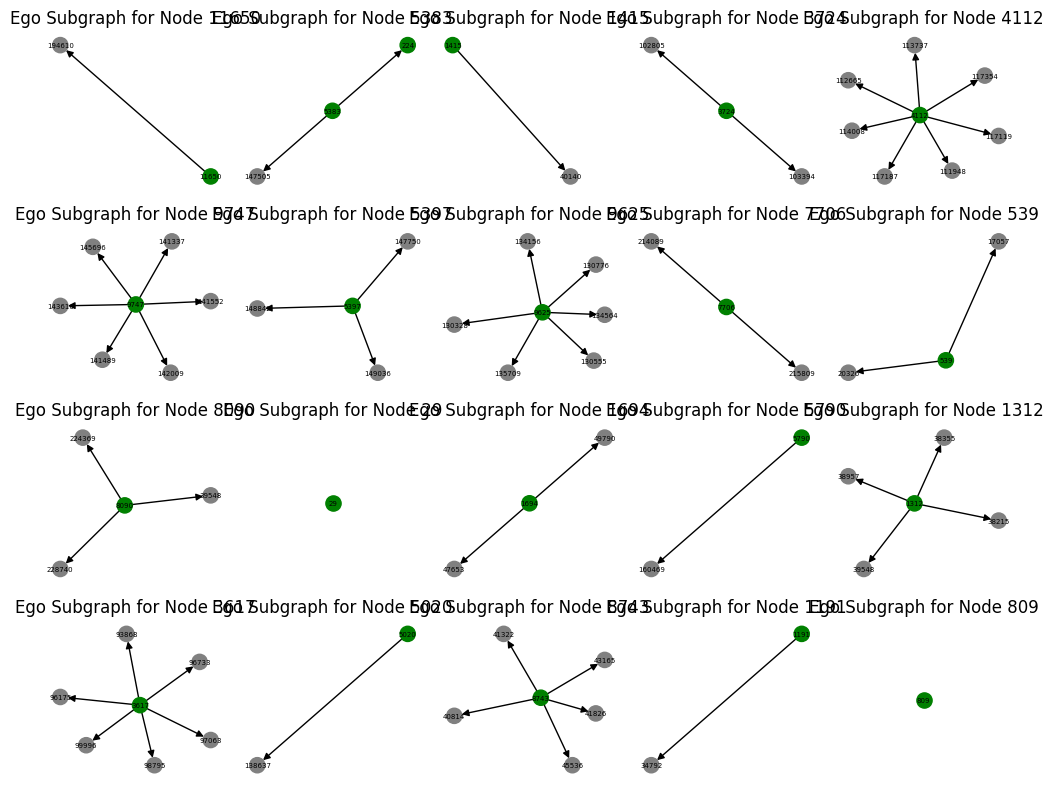

In [19]:
ego_plot(g6, humans0[:20], radius=3,num_rows=4, num_cols=5)

In [20]:
humans12 = list(set(class0_l).intersection(set(n12)))
humans12,len(humans12)

([0,
  2,
  3,
  516,
  1032,
  11272,
  522,
  2059,
  3596,
  4618,
  14,
  10767,
  4112,
  1553,
  9747,
  3604,
  21,
  2581,
  6170,
  539,
  1052,
  29,
  9758,
  7706,
  33,
  3617,
  547,
  3620,
  8743,
  9767,
  1067,
  1580,
  4140,
  3118,
  7727,
  1588,
  2109,
  10814,
  4158,
  5185,
  580,
  10829,
  9294,
  10831,
  592,
  1618,
  3154,
  3156,
  1111,
  8282,
  3163,
  5723,
  8286,
  1119,
  8288,
  1120,
  9314,
  2145,
  1124,
  10847,
  4195,
  103,
  2152,
  8297,
  1129,
  2153,
  4091,
  4197,
  5739,
  1138,
  8307,
  1140,
  7794,
  9846,
  3703,
  8825,
  2170,
  636,
  124,
  8318,
  1148,
  9340,
  11388,
  2690,
  4223,
  5215,
  1157,
  4230,
  2183,
  6786,
  8841,
  1162,
  2186,
  8332,
  1165,
  3724,
  2191,
  8336,
  8848,
  9361,
  147,
  8852,
  2193,
  2196,
  9367,
  2198,
  10905,
  3737,
  4243,
  4762,
  157,
  1694,
  4253,
  5790,
  8868,
  165,
  166,
  1191,
  2725,
  2726,
  2729,
  4265,
  1196,
  3756,
  5291,
  3759,
  4783,
  3762

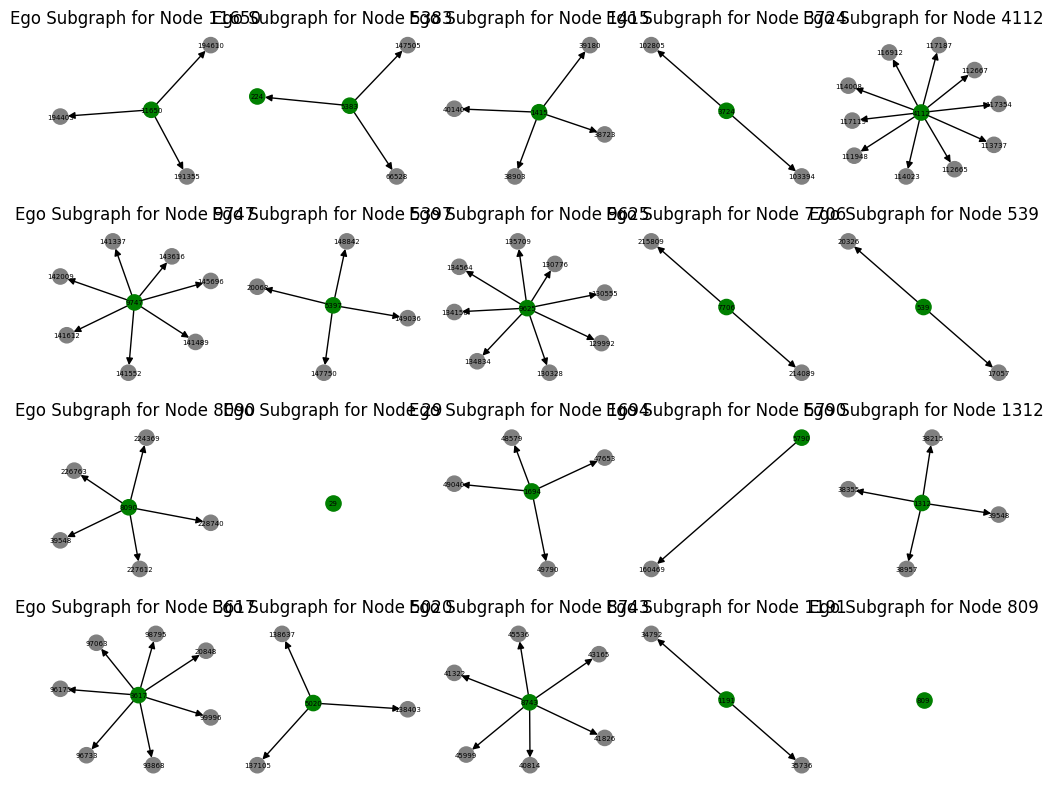

In [21]:
ego_plot(g12, humans0[:20], radius=3, num_rows=4, num_cols=5)

In [22]:
bots0 = list(set(class1_l).intersection(set(n1)))
bots0,len(bots0)

([3841,
  2822,
  8864,
  8104,
  3113,
  7858,
  4532,
  4921,
  5563,
  3646,
  11258,
  7880,
  8655,
  339,
  7769,
  3546,
  9820,
  7650,
  229,
  7782,
  1136,
  376,
  9338],
 23)

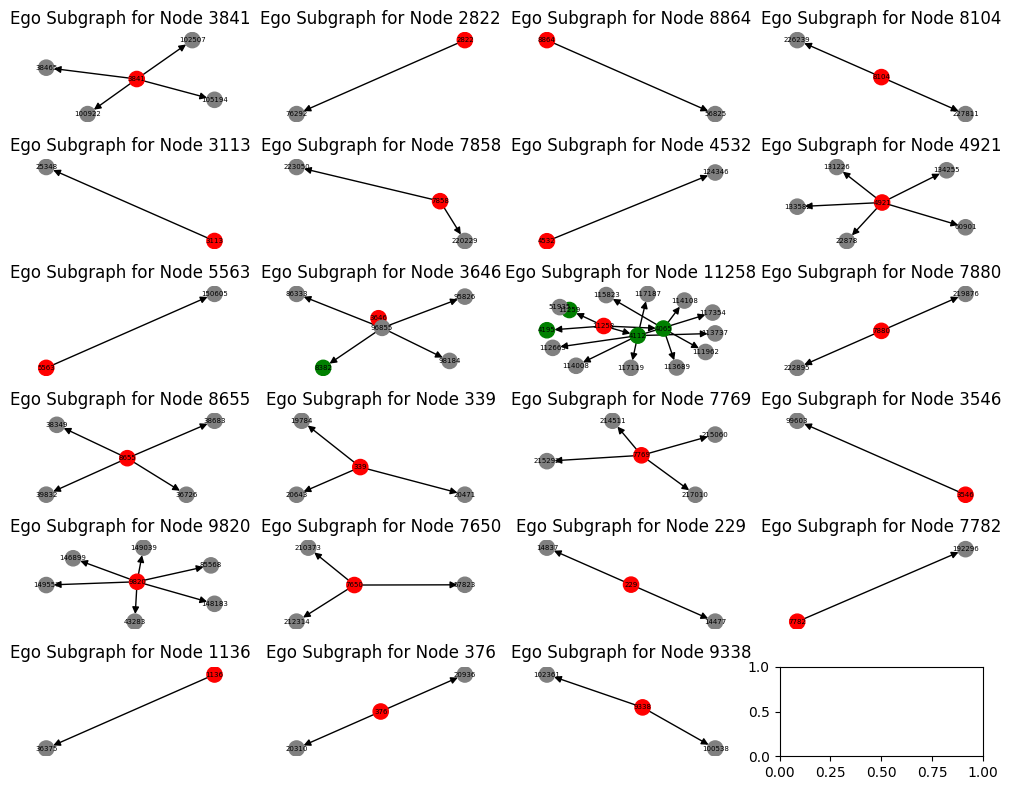

In [23]:
ego_plot(g1, bots0, radius=3,num_rows=6, num_cols=4)

In [24]:
bots6 = list(set(class1_l).intersection(set(n6)))
bots6,len(bots6)

([3584,
  7808,
  3841,
  517,
  2822,
  9338,
  3592,
  3595,
  2959,
  1424,
  5880,
  5522,
  9491,
  8864,
  3488,
  6434,
  1956,
  4645,
  9637,
  8104,
  425,
  3113,
  4526,
  7858,
  7987,
  4532,
  6840,
  4921,
  5563,
  3646,
  1982,
  6728,
  7880,
  3531,
  8655,
  5199,
  339,
  4181,
  7769,
  3546,
  9820,
  11102,
  2143,
  2784,
  7650,
  229,
  101,
  7782,
  10473,
  5229,
  9327,
  1136,
  9968,
  6003,
  11252,
  4086,
  376,
  11258,
  2429],
 59)

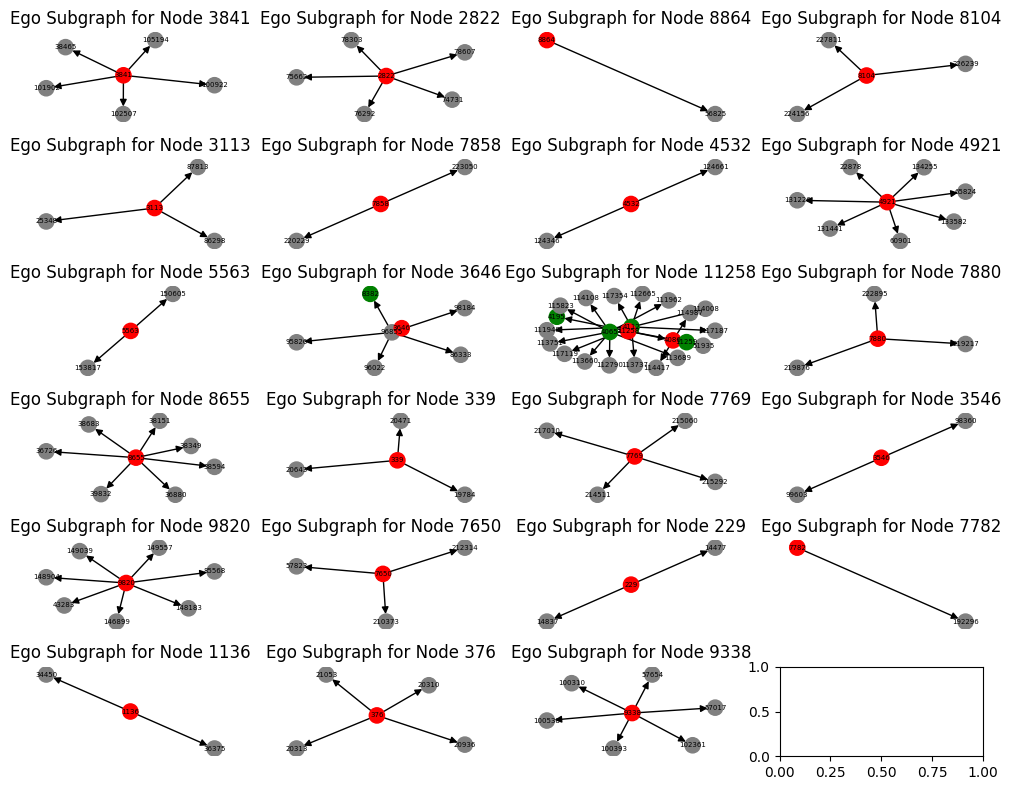

In [25]:
ego_plot(g6, bots0, radius=3,num_rows=6, num_cols=4)

In [26]:
bots12 = list(set(class1_l).intersection(set(n12)))
bots12,len(bots12)

([3584,
  3585,
  517,
  3592,
  3595,
  6155,
  9751,
  1057,
  7202,
  4645,
  3113,
  3625,
  4137,
  9261,
  3634,
  11315,
  9273,
  3646,
  3650,
  7748,
  6213,
  4166,
  6728,
  1612,
  5199,
  9813,
  4181,
  8281,
  7769,
  8284,
  9820,
  2143,
  4706,
  1635,
  101,
  7782,
  4199,
  1130,
  3691,
  1133,
  9326,
  9327,
  1136,
  5229,
  5232,
  4724,
  3704,
  9338,
  6784,
  7808,
  4241,
  9882,
  8864,
  4269,
  7858,
  10933,
  182,
  10936,
  6840,
  2240,
  10944,
  7876,
  7880,
  2763,
  6870,
  6871,
  4318,
  2784,
  7904,
  229,
  9446,
  10473,
  3306,
  9968,
  2295,
  5880,
  3841,
  2822,
  3852,
  9491,
  8981,
  10524,
  287,
  10528,
  4386,
  6434,
  2860,
  7987,
  2872,
  4921,
  5944,
  10563,
  11090,
  339,
  11102,
  2399,
  5984,
  10599,
  5992,
  9067,
  9069,
  6003,
  376,
  3448,
  3450,
  7547,
  2429,
  2431,
  6016,
  3464,
  9097,
  2959,
  1424,
  5522,
  9626,
  3484,
  3486,
  11168,
  11169,
  3488,
  5538,
  1956,
  9637,
  11175,
 

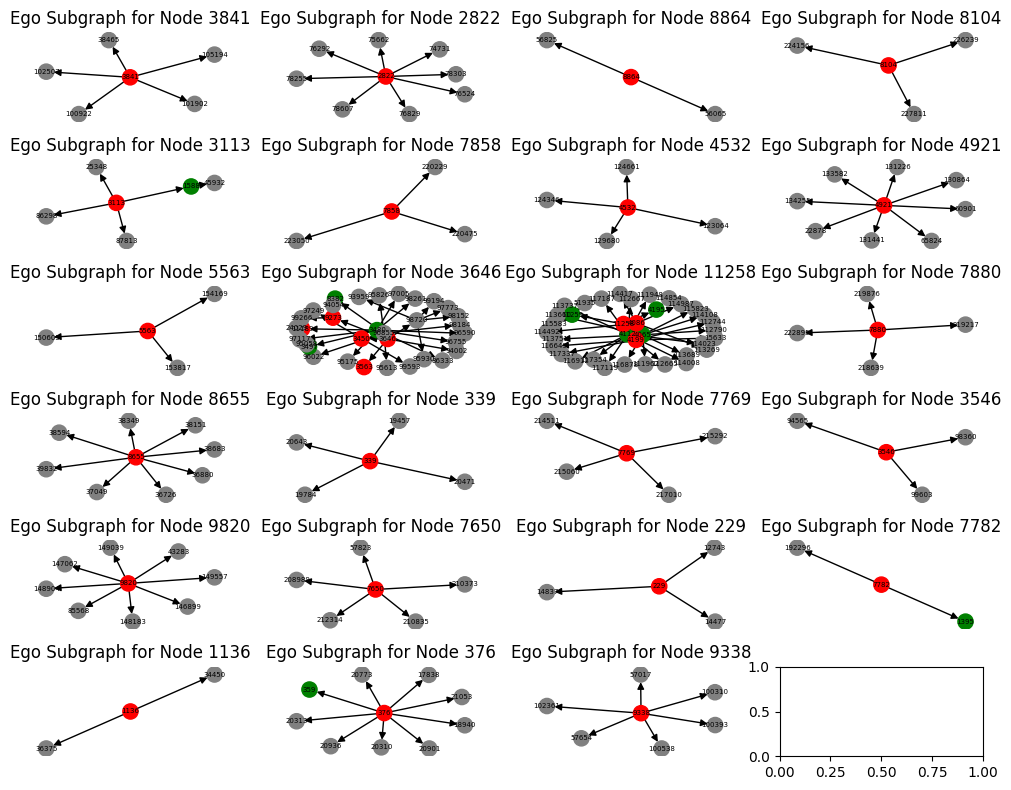

In [27]:
ego_plot(g12, bots0, radius=3,num_rows=6, num_cols=4)

### Graph-Based Analysis

In [28]:
# humans/bots in-degree/out-degree comparison
humans0_indeg, humans0_outdeg, bots0_indeg, bots0_outdeg = [],[],[],[]

for h in humans0:
    humans0_indeg.append(g1.in_degree(h))
    humans0_outdeg.append(g1.out_degree(h))

for b in bots0:
    bots0_indeg.append(g1.in_degree(b))
    bots0_outdeg.append(g1.out_degree(b))

print('humans0_indeg:',max(humans0_indeg))
print('humans0_outdeg:',max(humans0_outdeg))
print('bots0_indeg:',max(bots0_indeg))
print('bots0_outdeg:',max(bots0_outdeg))

humans0_indeg: 1
humans0_outdeg: 7
bots0_indeg: 1
bots0_outdeg: 6


In [29]:
len(humans0_indeg),len(humans0_outdeg),len(bots0_indeg),len(bots0_outdeg)

(55, 55, 23, 23)

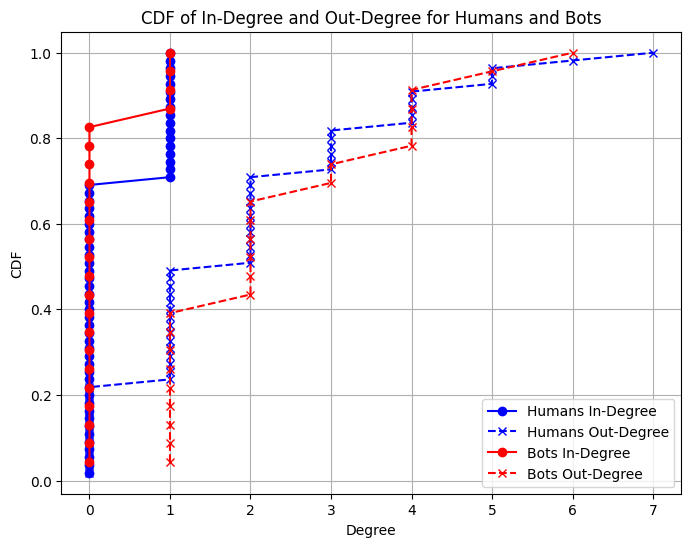

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# 计算CDF函数
def compute_cdf(data):
    # 将数据排序
    sorted_data = np.sort(data)
    # 计算每个点的累积概率
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cdf

# 计算每组数据的 CDF
x_humans0_indeg, cdf_humans0_indeg = compute_cdf(humans0_indeg)
x_humans0_outdeg, cdf_humans0_outdeg = compute_cdf(humans0_outdeg)
x_bots0_indeg, cdf_bots0_indeg = compute_cdf(bots0_indeg)
x_bots0_outdeg, cdf_bots0_outdeg = compute_cdf(bots0_outdeg)

# 绘制CDF图
plt.figure(figsize=(8, 6))

# 绘制 humans 的 CDF
plt.plot(x_humans0_indeg, cdf_humans0_indeg, label='Humans In-Degree', color='blue', linestyle='-', marker='o')
plt.plot(x_humans0_outdeg, cdf_humans0_outdeg, label='Humans Out-Degree', color='blue', linestyle='--', marker='x')

# 绘制 bots 的 CDF
plt.plot(x_bots0_indeg, cdf_bots0_indeg, label='Bots In-Degree', color='red', linestyle='-', marker='o')
plt.plot(x_bots0_outdeg, cdf_bots0_outdeg, label='Bots Out-Degree', color='red', linestyle='--', marker='x')

# 添加标签和标题
plt.xlabel('Degree')
plt.ylabel('CDF')
plt.title('CDF of In-Degree and Out-Degree for Humans and Bots')
plt.legend(loc='lower right')

# 显示图形
plt.grid(True)
plt.show()


In [31]:
sum(humans0_indeg)/len(humans0_indeg)

0.3090909090909091

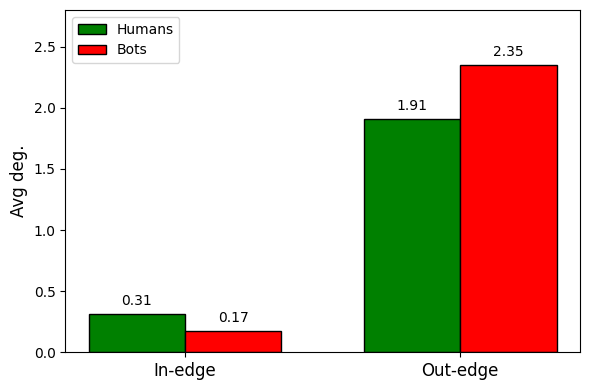

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
categories = ['In-edge', 'Out-edge']  # 分类标签
humans_avg = [sum(humans0_indeg)/len(humans0_indeg), sum(humans0_outdeg)/len(humans0_outdeg)]  # Fraudsters 的平均度
bots_avg = [sum(bots0_indeg)/len(bots0_indeg), sum(bots0_outdeg)/len(bots0_outdeg)]  # Normal users 的平均度

x = np.arange(len(categories))  # x 坐标
width = 0.35  # 柱状图的宽度

# 创建图形
fig, ax = plt.subplots(figsize=(6, 4))

# 绘制柱状图
bars1 = ax.bar(x - width/2, humans_avg, width, label='Humans', color='green', edgecolor='black')
bars2 = ax.bar(x + width/2, bots_avg, width, label='Bots', color='red', edgecolor='black')

# 添加数值标注
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, 
            f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)
for bar in bars2:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, 
            f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

# 设置轴标签和标题
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('Avg deg.', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.legend(loc='upper left', fontsize=10, frameon=True)
ax.set_ylim(0, 2.8)  # 设置 y 轴范围

# 美化图形
plt.tight_layout()
plt.show()


In [33]:
human_neighbors,bot_neighbors = [],[]
for h in humans0:
    nei = [n for n in g1.neighbors(h)]
    human_neighbors.append(nei)

for b in bots0:
    nei = [n for n in g1.neighbors(b)]
    bot_neighbors.append(nei)

In [34]:
### 计算节点特征和邻居特征的相似性
num_feats = torch.load(d_path+'num_properties_tensor.pt')
cat_feats = torch.load(d_path+'cat_properties_tensor.pt')
des_feats = torch.load(d_path+'des_tensor.pt')
tweet_feats = torch.load(d_path+'tweets_tensor.pt')

print(num_feats.shape,cat_feats.shape,des_feats.shape,tweet_feats.shape)

user_feats = torch.cat([num_feats,cat_feats,des_feats,tweet_feats],dim=1)
print(user_feats)

torch.Size([229580, 5]) torch.Size([229580, 3]) torch.Size([229580, 768]) torch.Size([229580, 768])
tensor([[ 1.3129e+01,  1.3628e+00, -2.7184e+00,  ..., -1.3311e-01,
          2.6048e-02, -1.2428e-02],
        [-9.2821e-02, -1.6109e+00,  1.3984e+00,  ..., -8.0113e-02,
         -2.5855e-03,  1.8312e-02],
        [ 5.6428e-01,  1.3566e+00, -1.2213e+00,  ..., -2.9526e-02,
          1.2250e-02,  6.5555e-03],
        ...,
        [-9.2710e-02,  1.2603e+00, -2.3441e+00,  ..., -8.0113e-02,
         -2.5855e-03,  1.8312e-02],
        [-9.2801e-02, -2.0575e-01,  1.0242e+00,  ..., -2.3822e-02,
          8.6118e-03, -2.2869e-02],
        [-9.2142e-02,  1.3926e+00,  6.4992e-01,  ..., -7.5998e-02,
          4.9636e-03,  1.5816e-02]])


In [35]:
user_feats.shape

torch.Size([229580, 1544])

In [36]:
import numpy as np

def cosine_similarity(vec1, vec2):
    """
    计算两个向量的余弦相似性
    :param vec1: 第一个向量，numpy 数组
    :param vec2: 第二个向量，numpy 数组
    :return: 余弦相似性值
    """
    # 计算点积
    dot_product = np.dot(vec1, vec2)
    # 计算向量的范数（长度）
    norm_a = np.linalg.norm(vec1)
    norm_b = np.linalg.norm(vec2)
    # 计算余弦相似性
    if norm_a == 0 or norm_b == 0:  # 防止除以 0
        return 0.0
    return dot_product / (norm_a * norm_b)

In [37]:
human_sim,h_sim = [],[]
for h in humans0:
    nei = [n for n in g1.neighbors(h)]
    for n in nei:
        h_sim.append(cosine_similarity(user_feats.numpy()[h,:],user_feats.numpy()[n,:]))
    human_sim.append(sum(h_sim)/len(h_sim))

bot_sim,b_sim = [],[]
for b in bots0:
    nei = [n for n in g1.neighbors(b)]
    for n in nei:
        b_sim.append(cosine_similarity(user_feats.numpy()[h,:],user_feats.numpy()[n,:]))
    bot_sim.append(sum(b_sim)/len(b_sim))  

In [38]:
sum(human_sim)/len(human_sim),sum(bot_sim)/len(bot_sim)

(0.9408256824185284, 0.1815201115001074)

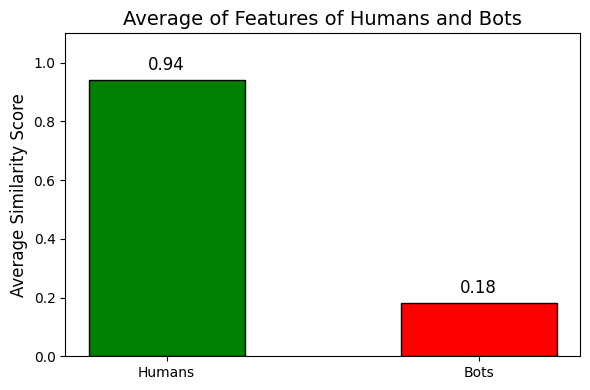

In [39]:
import matplotlib.pyplot as plt

# 数据
categories = ['Humans', 'Bots']
values = [sum(human_sim)/len(human_sim),sum(bot_sim)/len(bot_sim)]
colors = ['green', 'red']

# 绘制条形图
plt.figure(figsize=(6, 4))
bars = plt.bar(categories, values, color=colors, width=0.5, edgecolor='black')

# 添加数值标签
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, 
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=12)

# 设置标题和坐标轴标签
plt.title('Average of Features of Humans and Bots', fontsize=14)
plt.ylabel('Average Similarity Score', fontsize=12)
plt.ylim(0, 1.1)  # 调整 y 轴范围以更好显示数值标签

# 显示图表
plt.tight_layout()
plt.show()


In [125]:
### 特征TSNE可视化
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


tsne = TSNE()
Y = tsne.fit_transform(user_feats.numpy())



TypeError: expected str, bytes or os.PathLike object, not ndarray

In [126]:
np.save('twibot20_tsne0.npy',Y)

In [127]:
Y

array([[-106.0527  ,   17.143318],
       [  68.66502 ,  -82.50373 ],
       [ -68.59918 ,   56.824856],
       ...,
       [  20.611631,  -84.45962 ],
       [  28.808187,   33.53526 ],
       [  19.894182,   65.01215 ]], dtype=float32)

In [147]:
label

tensor([ 0,  1,  0,  ..., -1, -1, -1])

In [149]:
Y.shape

(229580, 2)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

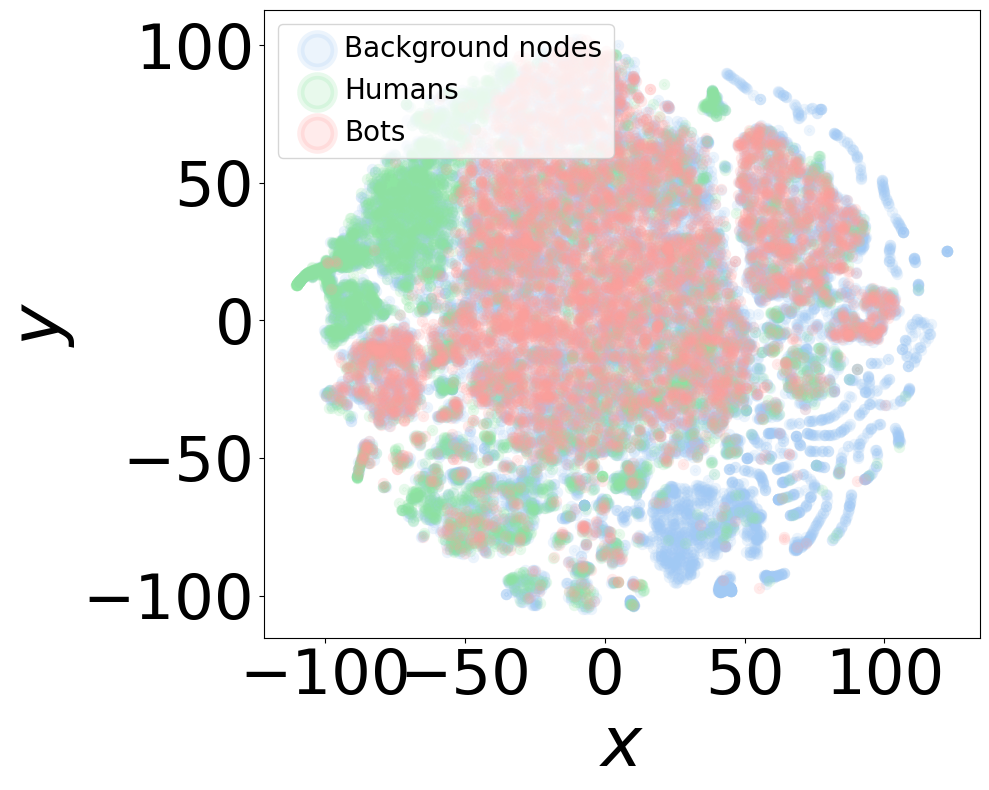

In [154]:
# Y = np.load('./tsne.npy')

sns.set_color_codes("pastel")
plt.rc('font', family='Times New Roman')

pic_id = 2

plt.figure(figsize=(10, 8))
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
s1 = plt.scatter(x=Y[:,0][label==-1][:15000],y=Y[:,1][label==-1][:15000],color='b',marker='.',alpha=0.2,linewidths=5.2,edgecolors=None)

s2 = plt.scatter(x=Y[:,0][label==0][:15000],y=Y[:,1][label==0][:15000],color='g',marker='.',alpha=0.2,linewidths=5.2,edgecolors=None)
s3 = plt.scatter(x=Y[:,0][label==1][:15000],y=Y[:,1][label==1][:15000],color='r',marker='.',alpha=0.2,linewidths=5.2,edgecolors=None)



#plt.legend(fontsize=32)


plt.xlabel('$x$',fontsize=50)
plt.ylabel('$y$',fontsize=50)
plt.legend((s1,s2,s3),('Background nodes','Humans','Bots') ,loc = 'upper left',fontsize=20,markerscale=8,handletextpad=0)
#plt.ylim(0,6)
#plt.xlim(-0.1,1)
plt.tight_layout()
# plt.savefig('./figure5.pdf',bbox_inches='tight', format='pdf')

In [50]:
g1_u = to_networkx(g1, to_undirected=True)

In [56]:
g1_u.edges

OutEdgeView([(183, 12007), (229, 14837), (229, 14477), (339, 20643), (339, 20471), (339, 19784), (376, 20936), (376, 20310), (539, 20326), (1136, 36375), (1191, 34792), (1312, 39548), (1312, 38355), (1312, 38957), (1312, 38215), (1355, 40302), (1694, 49790), (2152, 57199), (2152, 60893), (2245, 59884), (2245, 59666), (2822, 76292), (3113, 25348), (3546, 99603), (3617, 96175), (3617, 96733), (3617, 93868), (3617, 97063), (3617, 98795), (3646, 96855), (3703, 101449), (3703, 103669), (3724, 102805), (3794, 100144), (3794, 103994), (3794, 103369), (3794, 101260), (3841, 102507), (3841, 105194), (3841, 38465), (3841, 100922), (4065, 113689), (4065, 111962), (4065, 115823), (4065, 114108), (4112, 117354), (4112, 112665), (4112, 114008), (4112, 113737), (4112, 117119), (4112, 117187), (4197, 11258), (4532, 124346), (4822, 135398), (4822, 135533), (4825, 134254), (4825, 132919), (4825, 132111), (4921, 60901), (4921, 134255), (4921, 22878), (4921, 131226), (4921, 133582), (5020, 138637), (5291,

In [57]:
for h in humans0:
    print(h)

11650
5383
1415
3724
4112
9747
5397
9625
7706
539
8090
29
1694
5790
1312
3617
5020
8743
1191
809
9640
5291
1196
427
183
5943
316
8382
2245
1355
10829
10701
10831
3794
8915
6357
4822
7894
2391
4825
5976
224
4065
9314
4195
11236
4197
103
2152
8297
10607
243
3703
11259
8318


In [60]:
labels.shape[0]

229580

In [64]:
# h_back,b_back = 0,0
human_back_ratio, bot_back_ratio = [],[]
for h in humans0:
    h_back = 0
    nei = [n for n in g1_u.neighbors(h)]
    if len(nei) == 0:
        human_back_ratio.append(0)
    else:
        for n in nei:
            if n > 11826:
                h_back+=1
        human_back_ratio.append(h_back/len(nei))

for b in bots0:
    b_back = 0
    nei = [n for n in g1_u.neighbors(b)]
    if len(nei) == 0:
        bot_back_ratio.append(0)
    else:
        for b in nei:
            if b > 11826:
                b_back += 1
        bot_back_ratio.append(b_back/len(nei))


In [65]:
sum(human_back_ratio)/len(human_back_ratio),sum(bot_back_ratio)/len(bot_back_ratio)

(0.7196536796536797, 0.9565217391304348)

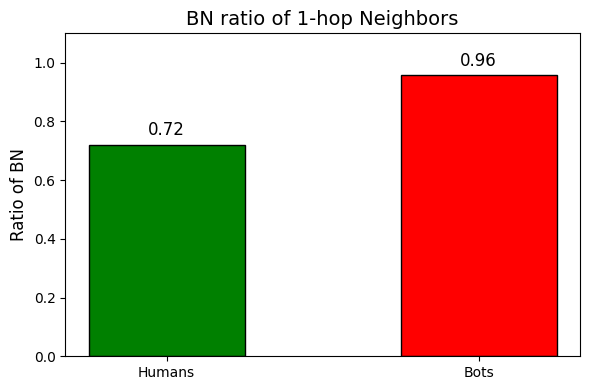

In [67]:
import matplotlib.pyplot as plt

# 数据
categories = ['Humans', 'Bots']
values = [sum(human_back_ratio)/len(human_back_ratio),sum(bot_back_ratio)/len(bot_back_ratio)]
colors = ['green', 'red']

# 绘制条形图
plt.figure(figsize=(6, 4))
bars = plt.bar(categories, values, color=colors, width=0.5, edgecolor='black')

# 添加数值标签
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, 
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=12)

# 设置标题和坐标轴标签
plt.title('BN ratio of 1-hop Neighbors', fontsize=14)
plt.ylabel('Ratio of BN', fontsize=12)
plt.ylim(0, 1.1)  # 调整 y 轴范围以更好显示数值标签

# 显示图表
plt.tight_layout()
plt.show()


In [69]:
g1_u

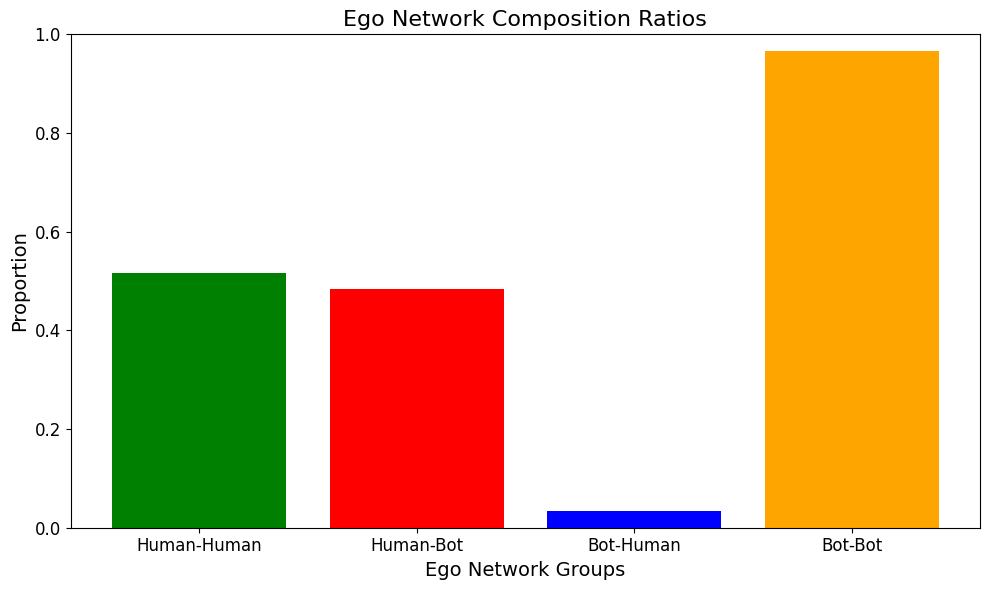

In [72]:
### 统计human和bot用户的ego network(3-hop)中包含human和bot的比率

from collections import defaultdict


# 为节点打标签
node_labels = {node: 'human' if node in humans0 else 'bot' for node in g1_u.nodes}

# 初始化计数器
human_ego_human_ratio = []
human_ego_bot_ratio = []
bot_ego_human_ratio = []
bot_ego_bot_ratio = []

# 遍历节点，统计 ego network 中的比例
for node in g1_u.nodes:
    ego = nx.ego_graph(g1_u, node)  # 提取 ego network
    total_count = len(ego.nodes)
    human_count = sum(1 for neighbor in ego.nodes if node_labels[neighbor] == 'human')
    bot_count = sum(1 for neighbor in ego.nodes if node_labels[neighbor] == 'bot')
    
    # 根据当前节点是 human 还是 bot，更新对应的列表
    if node in humans0:
        human_ego_human_ratio.append(human_count / total_count)
        human_ego_bot_ratio.append(bot_count / total_count)
    elif node in bots0:
        bot_ego_human_ratio.append(human_count / total_count)
        bot_ego_bot_ratio.append(bot_count / total_count)

# 计算平均比例
human_human_avg = np.mean(human_ego_human_ratio)
human_bot_avg = np.mean(human_ego_bot_ratio)
bot_human_avg = np.mean(bot_ego_human_ratio)
bot_bot_avg = np.mean(bot_ego_bot_ratio)

# 绘制柱状图
labels = ['Human-Human', 'Human-Bot', 'Bot-Human', 'Bot-Bot']
values = [human_human_avg, human_bot_avg, bot_human_avg, bot_bot_avg]

plt.figure(figsize=(10, 6))
colors = ['green', 'red', 'blue', 'orange']  # 设置每组柱子的颜色
plt.bar(labels, values, color=colors)

# 添加标题和标签
plt.title('Ego Network Composition Ratios', fontsize=16)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Ego Network Groups', fontsize=14)
plt.ylim(0, 1)  # 设置 y 轴范围为 0 到 1
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 显示图表
plt.tight_layout()
plt.show()

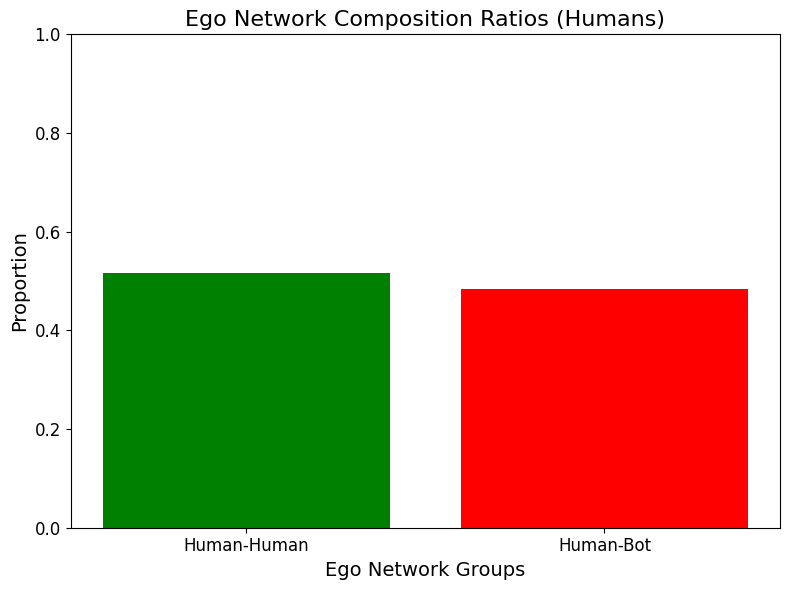

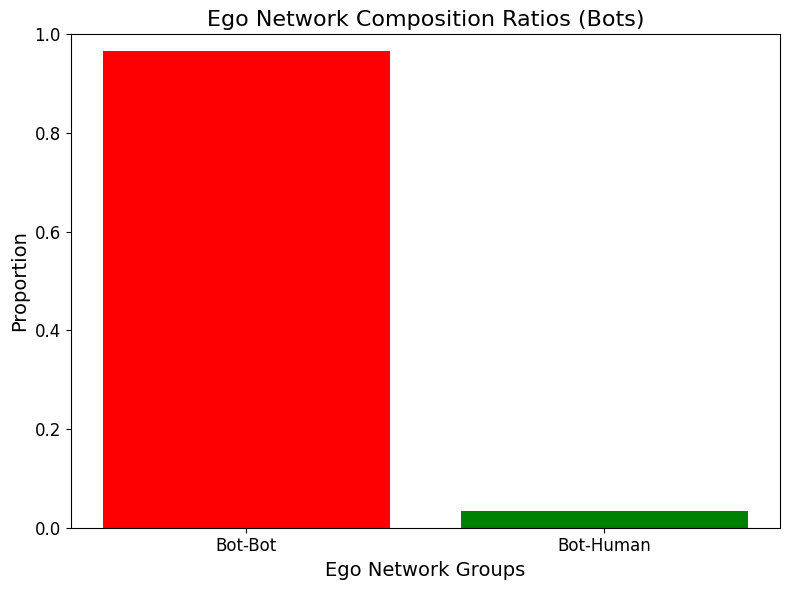

In [74]:
# 绘制第一张图：Human-Human 和 Human-Bot
plt.figure(figsize=(8, 6))
labels1 = ['Human-Human', 'Human-Bot']
values1 = [human_human_avg, human_bot_avg]
colors1 = ['green', 'red']  # 使用红色

plt.bar(labels1, values1, color=colors1)

# 添加标题和标签
plt.title('Ego Network Composition Ratios (Humans)', fontsize=16)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Ego Network Groups', fontsize=14)
plt.ylim(0, 1)  # 设置 y 轴范围为 0 到 1
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 显示第一张图
plt.tight_layout()
plt.show()

# 绘制第二张图：Bot-Bot 和 Bot-Human
plt.figure(figsize=(8, 6))
labels2 = ['Bot-Bot', 'Bot-Human']
values2 = [bot_bot_avg, bot_human_avg]
colors2 = ['red', 'green']  # 使用绿色

plt.bar(labels2, values2, color=colors2)

# 添加标题和标签
plt.title('Ego Network Composition Ratios (Bots)', fontsize=16)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Ego Network Groups', fontsize=14)
plt.ylim(0, 1)  # 设置 y 轴范围为 0 到 1
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 显示第二张图
plt.tight_layout()
plt.show()

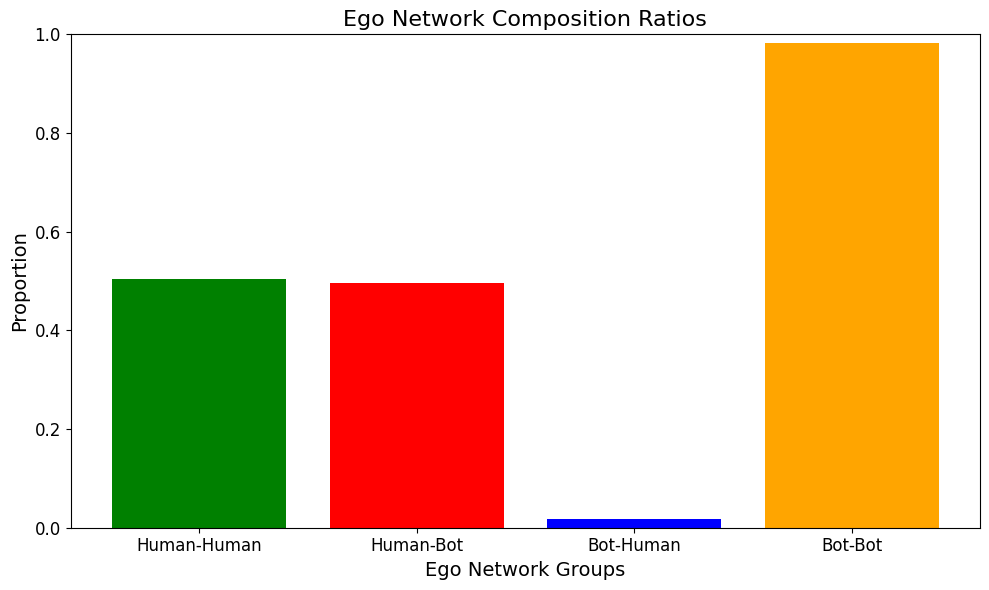

In [75]:
### 统计human和bot用户的ego network(3-hop)中包含human和bot的比率

from collections import defaultdict


# 为节点打标签
node_labels = {node: 'human' if node in humans0 else 'bot' for node in g1_u.nodes}

# 初始化计数器
human_ego_human_ratio = []
human_ego_bot_ratio = []
bot_ego_human_ratio = []
bot_ego_bot_ratio = []

# 遍历节点，统计 ego network 中的比例
for node in g1_u.nodes:
    ego = nx.ego_graph(g1_u, node, radius=3)  # 提取 ego network
    total_count = len(ego.nodes)
    human_count = sum(1 for neighbor in ego.nodes if node_labels[neighbor] == 'human')
    bot_count = sum(1 for neighbor in ego.nodes if node_labels[neighbor] == 'bot')
    
    # 根据当前节点是 human 还是 bot，更新对应的列表
    if node in humans0:
        human_ego_human_ratio.append(human_count / total_count)
        human_ego_bot_ratio.append(bot_count / total_count)
    elif node in bots0:
        bot_ego_human_ratio.append(human_count / total_count)
        bot_ego_bot_ratio.append(bot_count / total_count)

# 计算平均比例
human_human_avg = np.mean(human_ego_human_ratio)
human_bot_avg = np.mean(human_ego_bot_ratio)
bot_human_avg = np.mean(bot_ego_human_ratio)
bot_bot_avg = np.mean(bot_ego_bot_ratio)

# 绘制柱状图
labels = ['Human-Human', 'Human-Bot', 'Bot-Human', 'Bot-Bot']
values = [human_human_avg, human_bot_avg, bot_human_avg, bot_bot_avg]

plt.figure(figsize=(10, 6))
colors = ['green', 'red', 'blue', 'orange']  # 设置每组柱子的颜色
plt.bar(labels, values, color=colors)

# 添加标题和标签
plt.title('Ego Network Composition Ratios', fontsize=16)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Ego Network Groups', fontsize=14)
plt.ylim(0, 1)  # 设置 y 轴范围为 0 到 1
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 显示图表
plt.tight_layout()
plt.show()